In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Read in updated CSV
vacancies = pd.read_csv('vacancies_with_distances.csv')
vacancies.head()

,Unnamed: 0,Commercial District,Address,City,State,Zip Code,Square Footage,Length of Vacancy,Ownership Type,Former Tenant/Current Business,Business for Sale,Leasing Activity,Recorded Owner,Leasing Contact,long,lat,harv_dist,mit_dist,min_dist
0,0,Smaller Districts,123 River Street,Cambridge,Massachusetts,2139,900.0,5 years or more,Individual,River Gods,NaN,Leased pending occupancy,"Arthur N. Dobelis 263 Hicks St. #4 Brooklyn, N...","Arthur Dobelis, (646) 722-0824",-71.108716,42.364045,1.341712,1.444518,1.341712
1,1,Kendall Square,One Kendall Square,Cambridge,Massachusetts,2139,NaN,6-10 months,Real Estate Investment Trust (REIT),Flat Top Johnny’s,NaN,Unknown,"ARE-MA Region No. 59 LLC, 385 East Colorado Bo...",NaN,-71.090117,42.367439,2.347921,0.864902,0.864902
2,2,Fresh Pond-Alewife,93 Blanchard Rd,Cambridge,Massachusetts,2138,NaN,6-10 months,Trust,Knittin Kitten,NaN,Unknown,"Hillside Garden Supply Co., 280 Blanchard Rd.,...",NaN,-71.157993,42.394263,4.019789,6.631841,4.019789
3,3,Inman Square,168 Hampshire Street,Cambridge,Massachusetts,2139,840.0,5 years or more,Real Estate Investment Trust (REIT),Lapel's Dry Cleaning,NaN,Unknown,"Berkmar LLC c/o NCP Management Company, P.O. B...","NCP Management, Inc. (617) 630-1868",-71.098917,42.371861,1.520177,1.453325,1.453325
4,4,East Cambridge,149 Cambridge Street,Cambridge,Massachusetts,2141,NaN,6-10 months,NaN,Law Offices,NaN,Actively leasing,"Anthony Gargano, trustee of Gargano Family Tru...",(617) 876-6780,-71.078259,42.371000,3.213076,1.686457,1.686457


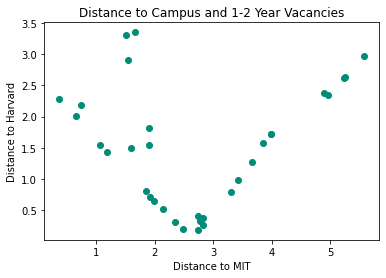

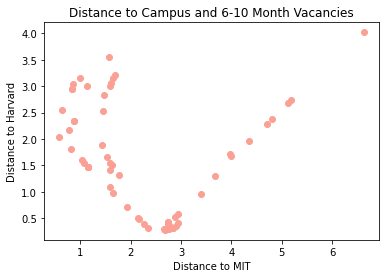

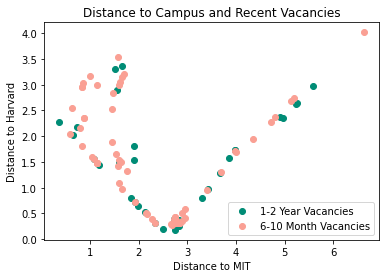

In [ ]:
# Separate vacancies by duration
year_vacancies = vacancies[(vacancies["Length of Vacancy"] == "1-2 years")]
month_vacancies = vacancies[(vacancies["Length of Vacancy"] == "6-10 months")]

# Plot of 1-2 year vacancies based on distance to either campus
plt.scatter(year_vacancies["mit_dist"],year_vacancies["harv_dist"],c='#008c76ff')
plt.xlabel("Distance to MIT")
plt.ylabel("Distance to Harvard")
plt.title("Distance to Campus and 1-2 Year Vacancies")
plt.show()

# Plot of 6-10 month vacancies based on distance to either campus
plt.scatter(month_vacancies["mit_dist"],month_vacancies["harv_dist"],c='#faa094ff')
plt.xlabel("Distance to MIT")
plt.ylabel("Distance to Harvard")
plt.title("Distance to Campus and 6-10 Month Vacancies")
plt.show()

plt.scatter(year_vacancies["mit_dist"],year_vacancies["harv_dist"],c='#008c76ff')
plt.scatter(month_vacancies["mit_dist"],month_vacancies["harv_dist"],c='#faa094ff')
plt.xlabel("Distance to MIT")
plt.ylabel("Distance to Harvard")
plt.title("Distance to Campus and Recent Vacancies")
plt.legend(["1-2 Year Vacancies" , "6-10 Month Vacancies"])
plt.show()


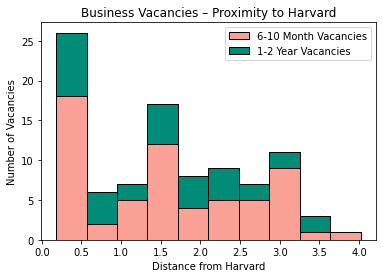

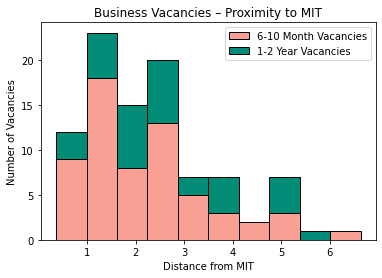

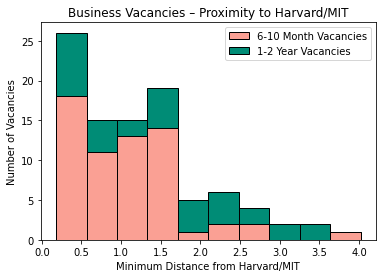

In [ ]:
plt.hist([month_vacancies["harv_dist"], year_vacancies["harv_dist"]], color = ["#faa094ff", "#008c76ff"], ec = "black", histtype="barstacked")
plt.xlabel("Distance from Harvard")
plt.ylabel("Number of Vacancies")
plt.legend(["6-10 Month Vacancies", "1-2 Year Vacancies"])
plt.title("Business Vacancies – Proximity to Harvard")
plt.show()

plt.hist([month_vacancies["mit_dist"], year_vacancies["mit_dist"]], color = ["#faa094ff", "#008c76ff"], ec = "black", histtype="barstacked")
plt.xlabel("Distance from MIT")
plt.ylabel("Number of Vacancies")
plt.legend(["6-10 Month Vacancies", "1-2 Year Vacancies"])
plt.title("Business Vacancies – Proximity to MIT")
plt.show()

plt.hist([month_vacancies["min_dist"], year_vacancies["harv_dist"]], color = ["#faa094ff", "#008c76ff"], ec = "black", histtype="barstacked")
plt.xlabel("Minimum Distance from Harvard/MIT")
plt.ylabel("Number of Vacancies")
plt.legend(["6-10 Month Vacancies", "1-2 Year Vacancies"])
plt.title("Business Vacancies – Proximity to Harvard/MIT")
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=57b93841-e07c-4246-b1c8-9c365e3b1114' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>